In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import importlib
import data_cleaning
import matplotlib.pyplot as plt
from data_cleaning import df_from_movie_csv, TABLE_FORMATS
%matplotlib inline

SyntaxError: invalid syntax (data_cleaning.py, line 29)

In [ ]:
dfs = {}
for table_name in TABLE_FORMATS.keys():
    dfs[table_name] = df_from_movie_csv(table_name)

## Basic dataframe info -- head & info

In [ ]:
for df_name,movie_df in dfs.items():
    print(df_name,"\n",movie_df.head())

In [ ]:
for df_name,movie_df in dfs.items():
    print(f"\n{df_name}")
    print(movie_df.info())

In [ ]:
for df_name,movie_df in dfs.items():
    print(f"\n{df_name}")
    print(movie_df.describe())

In [ ]:
Limit the years

In [ ]:
dfs['tmdb.movies'].release_date.describe()

In [ ]:
tmdb = dfs['tmdb.movies']
tmdb = tmdb[tmdb.release_date.dt.year > 2009]
tmdb.info()

## Distribution of IMDB movie ratings

In [ ]:
imdb_title_ratings = dfs['imdb.title.basics'].join(dfs['imdb.title.ratings'])

In [ ]:
imdb_title_ratings[(imdb_title_ratings.numvotes > 100000)]['averagerating'].hist()
plt.set_title('Average ratings')

In [ ]:
from split_data_fields import expand_df_split_fields
title_genres = expand_df_split_fields(dfs['imdb.title.basics'],'imdb.title.basics')

In [ ]:
top_movies = imdb_title_ratings[(imdb_title_ratings.numvotes > 100000)].copy()
top_movies.info()

Match most-rated IMDB movies to BOM data based on title. That gives us 520 movies.

In [ ]:
imdb_bom_df = top_movies.reset_index().set_index('primary_title') \
                        .join(dfs['bom.movie_gross'].set_index('title'), how='inner') \
                        .reset_index().set_index('tconst')

In [ ]:
imdb_bom_df

In [ ]:
imdb_bom_df.info()

## Plot top 500 most-rated movies by domestic gross and rating

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
sns.scatterplot(x=imdb_bom_df.averagerating,y=imdb_bom_df.domestic_gross)
ax.set_xlabel('average rating')
ax.set_ylabel('domestic gross')

In [ ]:
top_50k = imdb_title_ratings[(imdb_title_ratings.numvotes > 50000)].copy()

In [ ]:
imdb_bom_50k = top_50k.reset_index().set_index('primary_title') \
                        .join(dfs['bom.movie_gross'].set_index('title'), how='inner') \
                        .reset_index().set_index('tconst')

In [ ]:
imdb_bom_50k.info()

In [ ]:
imdb_bom_50k[imdb_bom_50k.numvotes < 100000]

In [ ]:
pd.set_option('display.max_rows',100)
imdb_bom_50k.groupby('studio').count().sort_values(by='index',ascending=False)

Is it easy to filter out foreign studios? We could look only at the most prolific studios or not worry about it. 

Match all the IMDB movies to BoxOfficeMojo set.

In [ ]:
imdb_bom_df_big = imdb_title_ratings.reset_index().set_index('primary_title') \
                        .join(dfs['bom.movie_gross'].set_index('title'), how='inner') \
                        .reset_index().set_index('tconst')

In [ ]:
imdb_bom_df_big.info()

In [ ]:
imdb_bom_df_big[~(imdb_bom_df_big.start_year == imdb_bom_df_big.year)]

In [ ]:
imdb_bom_df_big[(imdb_bom_df_big.numvotes>20000) & (imdb_bom_df_big.numvotes<50000)]

### Filtering by studios that have grossed at least a million dollars in the Box Office Mojo data.

In [ ]:
df = imdb_bom_df_big.copy()
df['ct'] = 1
pd.set_option('display.max_rows',300)
studios = df.groupby('studio').sum().sort_values(by='domestic_gross',ascending=False).query('domestic_gross > 1000000')

In [ ]:
studios.ct.sum()

In [ ]:
studios.info()

In [ ]:
studios.describe()

In [ ]:
imdb_bom_top_studios_df = imdb_bom_df_big[imdb_bom_df_big.studio.isin(list(studios.index))]

In [ ]:
imdb_bom_top_studios_df

In [ ]:
df = imdb_bom_top_studios_df
df

In [16]:
title_genre_ratings = title_genres.join(dfs['imdb.title.ratings'])

In [21]:
title_genre_ratings[(title_genre_ratings.numvotes > 100000) & (title_genre_ratings.genre == 'Action')] \
                   .averagerating.hist(by=title_genre_ratings['genre'])

ValueError: cannot reindex from a duplicate axis

This actually sort of appears to work:

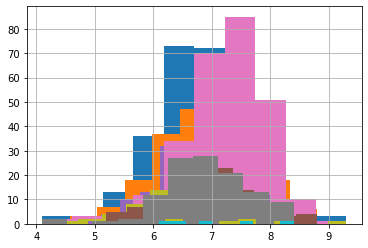

In [26]:
title_genre_ratings[title_genre_ratings.numvotes > 100000].groupby('genre').averagerating.hist();